<a href="https://colab.research.google.com/github/SarahSchnei/practice/blob/master/GoogleReviewsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A look at Google Reviews Ratings and average aages in Baton Rouge's fast food restraunts

I wondered if there was a relationship between a fast food worker's level of pay and the overall service of their restaurant. Measuring actual service level is tricky, so I decided to settle for my own most trusted source for researching places to eat: Google Reviews. Luckily, Google has an army of handy APIs full of information ready to be scraped. I decided to gather the data, reviews, and ratings for 10 of the most popular fast food restaurants in Baton Rouge from Google's Places API, and gathered average entry level wages and average manager salaries for those restaurants in Baton Rouge from Glassdoor.com.

In [0]:
gAPIkey= apikey

In [0]:
import pandas as pd
import re
!pip install googlemaps

import googlemaps
!pip install python-google-places

from googleplaces import GooglePlaces, types, lang

In [0]:
google_places = GooglePlaces(gAPIkey)

First, I'm going to build a few functions that will take the work of getting the data from Google's API a snap. I tried doing this by hand but quickly realized how tedious and error prone it was.

In [0]:
def get_placeID(keyword):
  query_results = google_places.nearby_search(location='Baton Rouge, Louisiana', keyword=keyword, radius=50000)
  keywordplaceID = []
  for place in query_results.places:
    keywordplaceID.append(place.place_id)
  return keywordplaceID

def get_ratingslist(x):
  ratingslist = []
  for i in x:
    query_result = google_places.get_place(place_id=i)
    query_result.get_details()
    ratingslist.append(query_result.rating)
  return ratingslist

def get_reviewslist(x):
  reviewslist = []
  for i in x:
    query_result = google_places.get_place(place_id=i)
    query_result.get_details()
    reviewslist.append(query_result.details)
  return reviewslist

def get_ratings_avg(ratinglist):
  x =[float(s) for s in re.findall(r'-?\d+\.?\d*', str(ratinglist))]
  y = sum(x)/len(x)
  return y

def get_reviewslist(x):
  reviewslist = []
  for i in x:
    query_result = google_places.get_place(place_id=i)
    query_result.get_details()
    reviewslist.append(query_result.details)
    df2 = pd.DataFrame(reviewslist)
    reviewsdf = df2.reviews
  return reviewsdf

In [0]:
x = get_placeID('Starbucks')
sbuxreviews = get_reviewslist(x)
sbuxratings = get_ratingslist(x)
sbuxaveragerating = get_ratings_avg(sbuxratings)

In [0]:
x = get_placeID('Mcdonalds')
McDonaldsreviews = get_reviewslist(x)
McDonaldsratings = get_ratingslist(x)
McDonaldsaveragerating = get_ratings_avg(McDonaldsratings)

In [0]:
x = get_placeID('Rasing Canes')
Canesreviews = get_reviewslist(x)
Canesratings = get_ratingslist(x)
Canesaveragerating = get_ratings_avg(Canesratings)

In [0]:
x = get_placeID('Taco Bell')
TacoBellreviews = get_reviewslist(x)
TacoBellratings = get_ratingslist(x)
TacoBellaveragerating = get_ratings_avg(TacoBellratings)

In [0]:
x = get_placeID('Subway')
Subwayreviews = get_reviewslist(x)
Subwayratings = get_ratingslist(x)
Subwayaveragerating = get_ratings_avg(Subwayratings)

In [0]:
x = get_placeID('Five Guys')
FGreviews = get_reviewslist(x)
FGratings = get_ratingslist(x)
FGaveragerating = get_ratings_avg(FGratings)

In [0]:
x = get_placeID('CCs Coffeehouse')
CCreviews = get_reviewslist(x)
CCratings = get_ratingslist(x)
CCaveragerating = get_ratings_avg(CCratings)

In [0]:
x = get_placeID('Chipotle')
Chipotlereviews = get_reviewslist(x)
Chipotleratings = get_ratingslist(x)
Chipotleaveragerating = get_ratings_avg(Chipotleratings)

In [0]:
x = get_placeID('Izzos')
Izzosreviews = get_reviewslist(x)
Izzosratings = get_ratingslist(x)
Izzosaveragerating = get_ratings_avg(Izzosratings)

In [0]:
x = get_placeID('Chick-fil-a')
Chickfilareviews = get_reviewslist(x)
Chickfilaratings = get_ratingslist(x)
Chickfilaaveragerating = get_ratings_avg(Chickfilaratings)

Now that I've gathered the data from Google's API, it's time to do some data wrangling

In [0]:
data = [['Chipotle', Chipotleaveragerating], ['Five Guys', FGaveragerating], ['McDonalds', McDonaldsaveragerating], 
['Izzos', Izzosaveragerating], ['Starbucks', sbuxaveragerating], ['Chick-fil-a', Chickfilaaveragerating],
['Taco Bell', TacoBellaveragerating], ['Canes', Canesaveragerating], ['CCs', CCaveragerating], ['Subway', Subwayaveragerating]]

In [0]:
df = pd.DataFrame(data, columns = ['place', 'avgrating'])

In [0]:
df['ratingsrank'] = df.avgrating.rank()

In [25]:
df = df.sort_values('avgrating')
df

,place,avgrating,ratingsrank
2,McDonalds,3.125000,1.0
6,Taco Bell,3.445000,2.0
9,Subway,3.780000,3.0
4,Starbucks,4.015789,4.0
3,Izzos,4.071429,5.0
8,CCs,4.175000,6.0
0,Chipotle,4.250000,7.0
7,Canes,4.420000,8.0
5,Chick-fil-a,4.440000,9.0
1,Five Guys,4.533333,10.0


In [26]:
from google.colab import files
uploaded = files.upload()

Saving BRwagedata.xlsx to BRwagedata.xlsx


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
wagedf = pd.read_excel('BRwagedata.xlsx')

In [29]:
wagedf

,place,entry wage,avg manager salary
0,Chick-fil-a,8.40,61152
1,Five Guys,9.00,47697
2,Chipotle,10.00,58500
3,Subway,8.00,30000
4,Izzos,8.00,45000
5,Taco Bell,8.00,43000
6,CCs,7.25,40378
7,McDonalds,8.00,41000
8,Canes,9.00,58650
9,Starbucks,9.00,52000


In [0]:
wagedf = wagedf.sort_values('entry wage')

In [0]:
fulldf = pd.merge(df, wagedf[['place', 'entry wage', 'avg manager salary']], on='place')
fulldf = fulldf.drop('ratingsrank', axis=1)

In [32]:
combineddf = fulldf
combineddf['entry_wage_rank'] = fulldf['entry wage'].rank()
combineddf['manager_salary_rank'] = fulldf['avg manager salary'].rank()
combineddf['ratings_rank'] = fulldf['avgrating'].rank()
combineddf

,place,avgrating,entry wage,avg manager salary,entry_wage_rank,manager_salary_rank,ratings_rank
0,McDonalds,3.125000,8.00,41000,3.5,3.0,1.0
1,Taco Bell,3.445000,8.00,43000,3.5,4.0,2.0
2,Subway,3.780000,8.00,30000,3.5,1.0,3.0
3,Starbucks,4.015789,9.00,52000,8.0,7.0,4.0
4,Izzos,4.071429,8.00,45000,3.5,5.0,5.0
5,CCs,4.175000,7.25,40378,1.0,2.0,6.0
6,Chipotle,4.250000,10.00,58500,10.0,8.0,7.0
7,Canes,4.420000,9.00,58650,8.0,9.0,8.0
8,Chick-fil-a,4.440000,8.40,61152,6.0,10.0,9.0
9,Five Guys,4.533333,9.00,47697,8.0,6.0,10.0


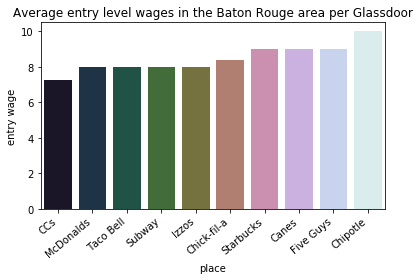

In [54]:
combineddf = combineddf.sort_values('entry_wage_rank')
ax = sns.barplot(combineddf.place, combineddf['entry wage'], data=combineddf, palette='cubehelix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Average entry level wages in the Baton Rouge area per Glassdoor')
plt.tight_layout()
plt.show()

  

Chipotle comes in at the top of our entry level wage table starting at 10 dollars an hour. CC's Coffeehouse is the lowest at 7.25. Our average entry leve wage is 8.47 an hour.


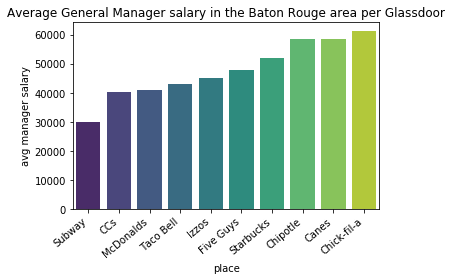

In [56]:
combineddf = combineddf.sort_values('manager_salary_rank')
ax = sns.barplot(combineddf.place, combineddf['avg manager salary'], data=combineddf, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Average General Manager salary in the Baton Rouge area per Glassdoor')
plt.tight_layout()
plt.show()

The average salary for a general manager in the Baton Rouge market is $47,737 a year, with Chick-fil-a paying the highest.

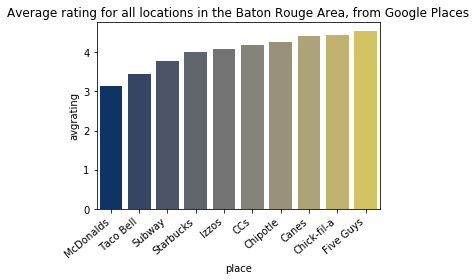

In [35]:
ax = sns.barplot(df.place, df.avgrating, data=df, palette='cividis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Average rating for all locations in the Baton Rouge Area, from Google Places')
plt.tight_layout()
plt.show()

Of our 10 restaurants, Five Guys has the highest Google Places ranking (they only have 3 Baton Rouge Locations), followed by Chick-fil-a (10 locations(Including campus and food court locations)) and Raising Canes  (20 locations)

I want to take a look at the mexican burrito/fast food restaurants in our dataset to get a comparison of similar food types

In [0]:
tacocomparison = df[(df['place'].isin(['Izzos', 'Chipotle', 'Taco Bell']))]


In [0]:
tacodf = pd.merge(tacocomparison, fulldf[['place', 'entry wage', 'entry_wage_rank', 'avg manager salary', 'manager_salary_rank']], on='place')

In [38]:
tacodf

,place,avgrating,ratingsrank,entry wage,entry_wage_rank,avg manager salary,manager_salary_rank
0,Taco Bell,3.445000,2.0,8.0,3.5,43000,4.0
1,Izzos,4.071429,5.0,8.0,3.5,45000,5.0
2,Chipotle,4.250000,7.0,10.0,10.0,58500,8.0


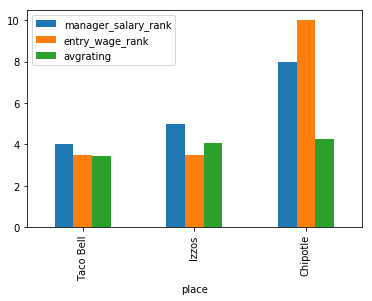

In [39]:
tacodf.plot(x='place', y=['manager_salary_rank', 'entry_wage_rank', 'avgrating'], kind='bar')

In the above chart we can see that Chipotle has the highest average google review rating, highest average manager salary rank, as well as one of the highest entry level worker wages in the taco/fast mexican food category.

In [42]:
correlations = fulldf[['avgrating', 'entry wage', 'avg manager salary']]
correlations = correlations.corr(method='pearson')
correlations

,avgrating,entry wage,avg manager salary
avgrating,1.000000,0.432813,0.596921
entry wage,0.432813,1.000000,0.680789
avg manager salary,0.596921,0.680789,1.000000


So it looks like the average manager salary is the most important factor in getting a high average rating, but entry wage isn't far behind. Let's check and see if there's a relationship between high manager pay and high entry level pay.

In [44]:
paycorr = fulldf[['avg manager salary', 'entry wage']]
paycorr

,avg manager salary,entry wage
0,41000,8.00
1,43000,8.00
2,30000,8.00
3,52000,9.00
4,45000,8.00
5,40378,7.25
6,58500,10.00
7,58650,9.00
8,61152,8.40
9,47697,9.00


In [45]:
correlations2 = paycorr.corr(method='pearson')
correlations2

,avg manager salary,entry wage
avg manager salary,1.000000,0.680789
entry wage,0.680789,1.000000


To me it looks like manager salary is definitely related to entry level wages, which makes sense.

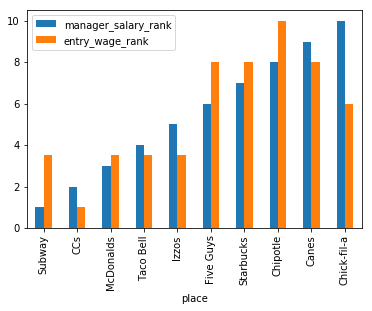

In [46]:
fulldf = fulldf.sort_values('manager_salary_rank')
fulldf.plot(x='place', y=['manager_salary_rank', 'entry_wage_rank'], kind='bar')

Now let's visualize the relationship between average rankings are related to manager salary rank

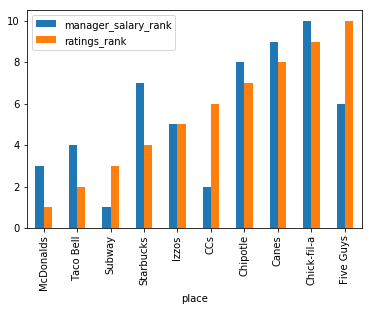

In [51]:
fulldf = fulldf.sort_values('ratings_rank')
fulldf.plot(x='place', y=['manager_salary_rank', 'ratings_rank'], kind='bar')

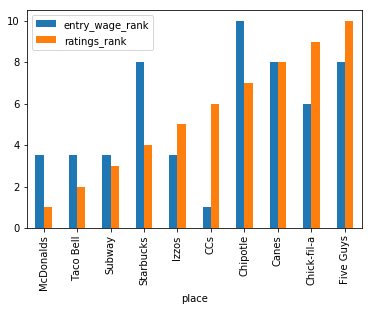

In [50]:
fulldf = fulldf.sort_values('ratings_rank')
fulldf.plot(x='place', y=['entry_wage_rank', 'ratings_rank'], kind='bar')

It looks like as manager salary increases, average ratings tend to increase. The relationship between entry wages and average ratings is weaker, which is suprising to me, but the relationship between manager salary and entry wages makes sense.

Up next I want to analyze the text of the google reviews left, but I have to figure out how to untangle them, they come out of the API in a list that holds a very nested dictionary, it's another puzzle for another weekend.